# Collective Intelligence

Generate a survey example to display result as a Likert plot

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import random
import colorlover as cl

## Generate Survey Results as CSV file

In [4]:
sentimental_scale = [-1.0,0.0,1.0]

In [5]:
def get_random_probabilities():
    """
    Return random probability weights for each item on a Likert scale
    (Otherwise, each choice will be weighted equally, making for uniform but boring graphs.)
    """
#     random_numbers = rng.random(len(plot_likert.scales.raw5))
    random_numbers = rng.random(len(sentimental_scale))
    return random_numbers / random_numbers.sum()

def get_random_response_column(n):
    """
    Return n randomly chosen (and weighted) responses from the agree scale
    """
#     return rng.choice(plot_likert.scales.raw5, n, p=get_random_probabilities())
    return rng.choice(sentimental_scale, n, p=get_random_probabilities())

def get_random_responses(respondents, questions):
    """
    Return randomly chosen (and weighted) responses from the agree scale,
    an ndarray with <respondents> rows and <questions> columns
    """
    columns = [get_random_response_column(respondents) for i in range(questions)]
    return np.transpose(np.vstack(columns))

In [6]:
rng = np.random.default_rng(seed=42)
num_sample_graphs = 100
respondents_min = 500
respondents_max = 5000
questions_min = 1
questions_max = 8

# Generate random numbers of respondents for each question uniformly
respondents_all = rng.integers(respondents_min, respondents_max, num_sample_graphs)

# Generate random numbers of respondents for each question, biasing towards fewer responses)
# respondents_all = respondents_min + (rng.standard_exponential(num_sample_graphs) * 1000).astype(int)

# Generate how many questions each figure will have
questions_all = rng.integers(questions_min, questions_max, num_sample_graphs)
graphs = zip(respondents_all, questions_all)

In [7]:
question_labels = ['Flexible hours','Advertising','Salary','Training','Job Descriptions','Work Culture','Benefits']

for f, (respondents, questions) in enumerate(graphs):
    responses = get_random_responses(respondents, questions)
    data = pd.DataFrame(responses, columns=question_labels[0:questions])

sex = ['M', 'F']
data['Sex'] = [random.choice(sex) for r in data.index]

age = ['18-29', '30-39', '40-49', '50+']
data['Age'] = [random.choice(age) for r in data.index]

data.to_csv("./survey_report.csv", sep=',',index=False)

## Plot Results by Tag

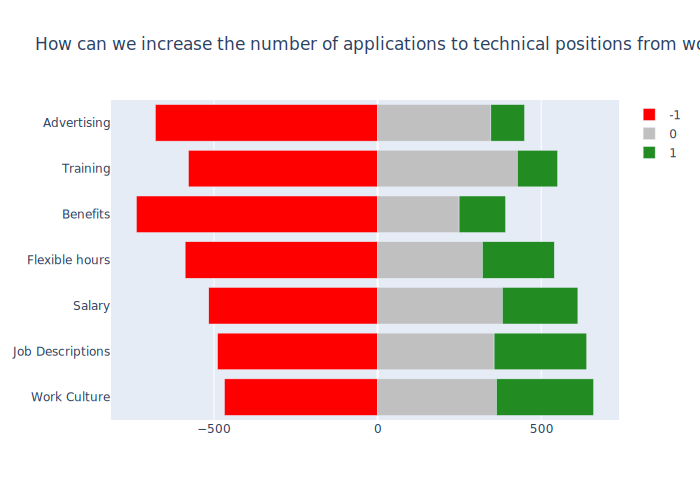

In [15]:
pd.options.plotting.backend = "plotly"

df = pd.read_csv('survey_report.csv')

category_order = ['-1','0','1']
dic = {'questions':category_order}

for col in df:
    if col not in ['Sex', 'Age']:
        dic[col]=list(df[col].value_counts())

new_df = pd.DataFrame.from_dict(dic, orient='index')
new_df.columns = new_df.iloc[0]
new_df = new_df.drop(new_df.index[0])
new_df = new_df.sort_values(by='1', ascending = False)
new_df[['-1']] = new_df[['-1']]*-1
# print(new_df)

colors = {
    '-1':'red',
    '0':'silver',
    '1':'forestgreen'
}

fig = go.Figure()

for column in new_df.columns:
    fig.add_trace(go.Bar(
        x = new_df[column],
        y = new_df.index,
        name = column,
        orientation = 'h',
        marker_color = colors[str(column)]
    ))
fig.update_layout(
    barmode = 'relative',
    title = 'How can we increase the number of applications to technical positions from women?'
)
fig.show("svg")

## Plot Results by Sex

Sex
F    558
M    570
Name: Sex, dtype: int64


/usr/local/lib/python3.9/site-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



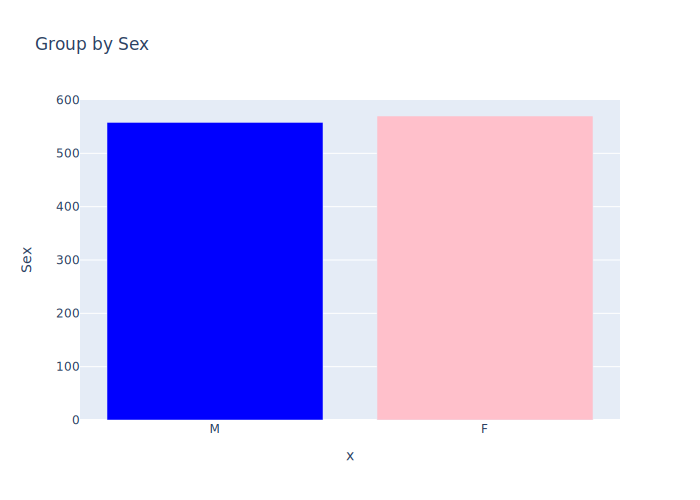

In [14]:
group=df.groupby('Sex')['Sex'].count()
print(group)
fig = px.bar(group, x=['M', 'F'], y='Sex', color="Sex", title="Group by Sex")
fig.update_traces(marker_color=['blue', 'pink'])
fig.show("svg")

## Plot Results by Age

Age
18-29    271
30-39    311
40-49    275
50+      271
Name: Age, dtype: int64


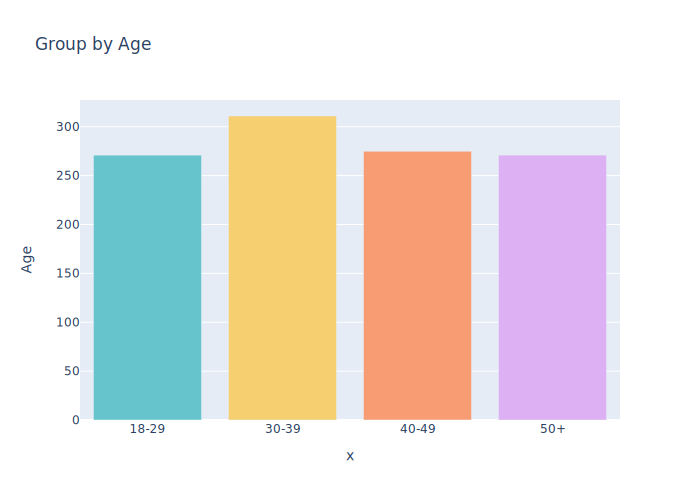

In [13]:
group=df.groupby('Age')['Age'].count()
print(group)
fig = px.bar(group, x=['18-29', '30-39', '40-49', '50+'], y='Age', color="Age", title="Group by Age")
fig.update_traces(marker_color= px.colors.qualitative.Pastel)
fig.show("svg")

## Plot Results by Sex and Age

Age  18-29  30-39  40-49  50+
Sex                          
F      126    154    140  138
M      145    157    135  133


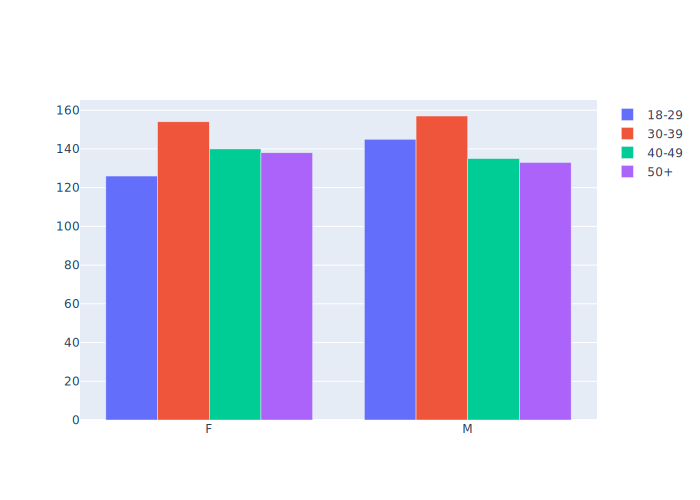

In [12]:
group=df.groupby(['Sex', 'Age']).size()
group=group.unstack()
print(group)

fig = go.Figure()
for column in group:
    fig.add_trace(go.Bar(
        x = group.index,
        y = group[column],
        name = column,
    ))
fig.show("svg")